In [52]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# The Basics
"There are three types of lies: lies, damned lies and statistics." -- Benjamin Disraeli (1804-1881)

This quote by Disraeli expresses a common sentiment.  Especially in the biosciences, statistics is often used in a cookie-cutter way to distinguish between significant and insignificant results, but we are all left with a bad taste in our mouth when trying to deeply think about the underlying concepts.
In this class, I would like to instead pursue the subject of data analysis using a probabilistic approach that was formulated by Bayes (published in 1763) and later refined by Laplace (1812).
# Introduction
In Science we are faced with a difficult task.  We are observing the world through experiments but what we would like to derive from this are its laws.  Unfortunately, this task is not only difficult, but it is actually an impossible task.  The reason for this is that there are many possible laws that could explain all the data that we collect.  This is in contrast to mathematical logic, where everything can be derived from a set of axioms.  The mathematician is asking: given a cause, can we work out its consequences? Scientist do the reverse: Given that certain effects have been observed, what are the underlying causes?
# Coin flip example
To illustrate the problem, we are going to start with a familiar problem: the coin flip.  Let us assume that you are visiting Las Vegas and someone invited you to a game in which you bet one dollar and after a coin flip you get paid two dollars for heads but lose your bet when tails come.  It is pretty clear from the outset that if the game uses a "fair" coin (tails:head = 1:1) then you should not win or lose any money.  To make it more interesting the person that invited you to play flips the coin 10 times and you observe that heads came 6 times and tails came 4 times.  How does this information help you to decide whether to play this game since you suspect that the coin is probably not fair (it is Las Vegas after all).

The first thing that we can do is to ask a different question: What is the probability that 6 heads out of ten resulted from a fair coin (some statistician would call the fair coin the "null hypothesis").  Here we are going to employ the Bionomial distribution which gives us what we are looking for:

$$P( X = k \mid N,p) =  \frac{N!}{(N-k)!k!}  p^k(1-p)^{N-k}$$

Notice that we wrote the Binomial distribution as a conditional probability to indicate that it represents the probability of $X=k$ given $N$ and $p$. Below we are calculating the odds for each situation:

In [53]:
from scipy.stats import binom
rv = binom(10,0.5)
for i in range(10):
    print("tossing",i,"tails in 10 tries, p = ",rv.pmf(i))

tossing 0 tails in 10 tries, p =  0.0009765625
tossing 1 tails in 10 tries, p =  0.009765625
tossing 2 tails in 10 tries, p =  0.0439453125
tossing 3 tails in 10 tries, p =  0.1171875
tossing 4 tails in 10 tries, p =  0.205078125
tossing 5 tails in 10 tries, p =  0.24609375
tossing 6 tails in 10 tries, p =  0.205078125
tossing 7 tails in 10 tries, p =  0.1171875
tossing 8 tails in 10 tries, p =  0.0439453125
tossing 9 tails in 10 tries, p =  0.009765625


25% of the time we are getting 5 heads but the chances of observing 6 heads (or 4 heads) is 20.5%.
The quantity that we just calculated is also called the likelihood of the data. In other words, what is the probability that we observed the data given that the probability of getting heads from a coin flip is p. In our case here p=0.5.

This result does not really help us in deciding whether we should play this game.  It could be a fair coin, it could be an unfair coin in favor of us winning, but it could also be an unfair coin that will lose us money.

To solve this problem we have to derive Bayes theorem which relates to conditional probabilities.  A conditional probability is the probability that something is true (lets say A) if something else is true (lets say B).  It is written as $P(A \mid B)$. Now lets ask what is the probability that A and B are true.  It is obvious that this is $P(A \cap B)=P(A \mid B)P(B)$.  You probably have already noticed that $P(A \cap B)=P(B \cap A)$ so that $P(A \mid B)P(B)=P(B \mid A)P(A)$.  This identity is rewritten as Bayes theorem:
$$P(A \mid B)=\frac{P(B \mid A)P(A)}{P(B)}$$

Bayes theorem shows you how to calculate the inverse conditional probability.  This is exactly what we need in our case.

What we would like to know is the probability distribution of the coin toss probability (or fairness of the coin) given that we just observed 6 heads out of 10 tosses.  So lets observe Bayes theorem and rewrite it so that we understand the meaning of each term:

$$P(p \mid D)=\frac{P(D \mid p)P(p)}{P(D)}$$

$P(D \mid p)$ is the likelihood of the data and $P(p \mid D)$ is what we want to know.  $P(p)$ is called the prior and represents the probability distribution of our prior knowledge.  This is the trickiest part of this calculation since it is subjective.  For example, if you are completely naive then maybe a uniform distribution is appropriate.  If you assume that coins are usually fair then this distribution should be represented by a sharp distribution centered around p=0.5. On the other hand, if you are convinced that coins in Las Vegas are typically unfair, maybe you want to use a distribution that is U-shaped.

So why don't we try some of these distributions out?

But before we start, I would like to introduce a special distribution that is often used in conjunction with binary problems such as the Bionomial distribution.  It is called the Beta distribution as expressed in:

$$P(\theta \mid \alpha,\beta) =  \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}  \theta^{\alpha-1}(1-\theta)^{\beta-1}$$

It looks very similar to the Binomial distribution only that it a variable of $\theta$, the probability of heads in a coin flip, and is normalized so that the integral over $\theta$ is 1. $\Gamma(\alpha)$ is a special function called the Gamma function.

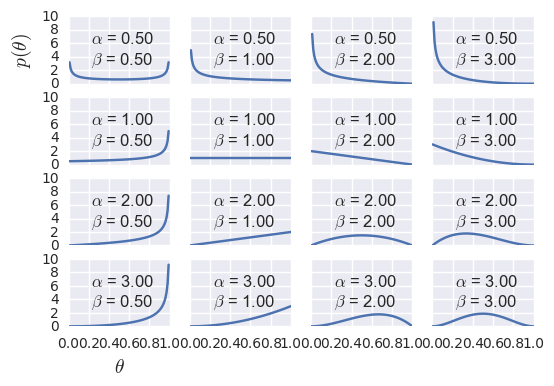

In [54]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True,
                     sharey=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[3,0].set_xlabel('$\\theta$', fontsize=14)
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14) 

So lets see whether we can calculate the posterior pdf for our case:

$$P(p \mid D) \propto P(D \mid p)P(p)=\frac{N!}{(N-k)!k!}  p^k(1-p)^{N-k}\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}  p^{\alpha-1}(1-p)^{\beta-1}$$

It is easy to recognize that after you combine the terms for $p$ and $1-p$ the function looks like a beta distribution if you use $\alpha_{post} = \alpha_{prior}+k$ and $\beta_{post} = \beta_{prior}+N-k$.

So lets plot the results:

In [1]:
dist = stats.beta
alpha_prior = 0.5
beta_prior = 3.0
N=10
k=6
x = np.linspace(0,1,100)
prior=dist(alpha_prior,beta_prior)
posterior=dist(alpha_prior+k,beta_prior+N-k)
plt.plot(x,prior.pdf(x))
plt.plot(x,posterior.pdf(x))

NameError: name 'stats' is not defined

Now that we have the posterior pdf, we can draw a sample and create a simulated data set.  This often helps when trying to decide whether the model is appropriate.  In our case, there is really no doubt since we have all the information about the system that we need.  So let's just do it.

[ 0.31297786  0.49046525  0.58816574  0.68195109  0.8346968 ]


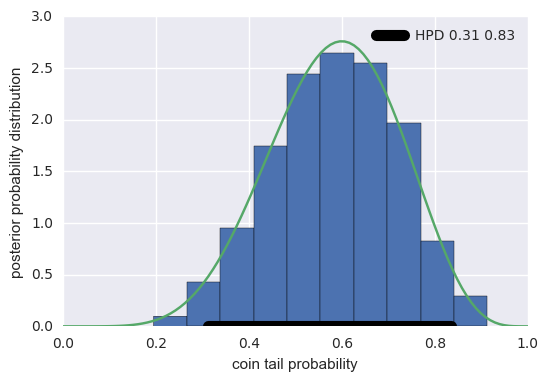

In [56]:
sample = posterior.rvs(1000)
print(np.percentile(sample,[2.5,25,50,75,97.5]))
HPD = np.percentile(sample,[2.5,97.5])
plt.hist(sample, normed=True)
plt.plot(x,posterior.pdf(x))
plt.plot(HPD,[0,0],label='HPD {:.2f} {:.2f}'.format(*HPD),
        linewidth=8, color='k')
plt.legend(fontsize=10)
plt.xlabel('coin tail probability')
plt.ylabel('posterior probability distribution')

In the previous graph we calculated the high probability density (HPD) interval that contains the 95% of the probability density.  For this we used the numpy function np.percentile.  Below is an example where this approach would fail.  For bi- or multi-modal distributions the percentile HPD does not make sense since a lot of the low probability density is in the interval.  The solution is to split the HPD into serveral separate intervals.

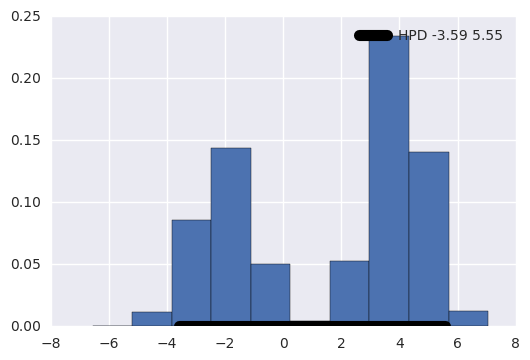

In [57]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))
HPD = np.percentile(mix_norm,[2.5,97.5])
plt.hist(mix_norm, normed=True)
plt.plot(HPD,[0,0],label='HPD {:.2f} {:.2f}'.format(*HPD),
        linewidth=8, color='k')
plt.legend(fontsize=10)

# homework 2
write a function that takes a probability distribution sample and calculate the high probability density intervals.  Report all continuous regions as separate intervals.  Please test it with the above bimodal distribution and see whether you get to HPD regions instead of just one.